A Support Vector Machine is capable of linear or nonlinear classification, regression, and even outlier detection. SVMs are particularly well suited for classification of complex but small- or medium-sized datasets. (For this chapter best read the original content in the book.)

# Linear SVM Classification

The fundamental idea befind SVMs is that if two classes are linearly seperable, the the decision boundary (the line) in an SVM not only separates the two classes but also stays as far away from the closest training instances as possible. You can think of an SVM classifier as fitting the widest possible street between the classes.

## Soft Margin Classification

If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification. The issues with hard margin classification is that first, it only works if the data is linearly separable, and second it is quite sensitive to outliers. The soft margin classification is a good balance between keeping the street as large as possible and limiting the margin violations.

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# example code of using SVM classification
iris = datasets.load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')), # C is the regularization parameter
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [10]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Nonlinear SVM Classification

One approach to handling nonlinear datasets is to add more features, such as polynomial features.

/usr/local/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


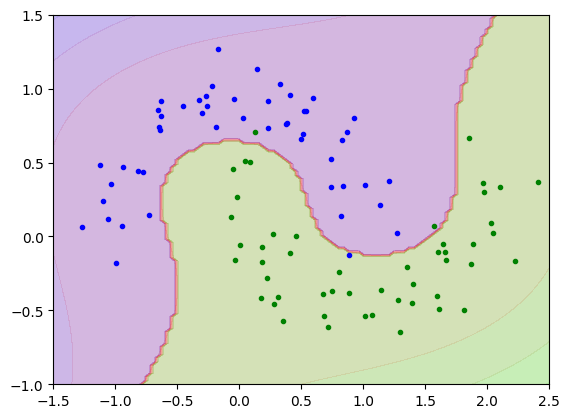

In [37]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge')),
])

polynomial_svm_clf.fit(X, y)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'b.')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g.')
x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-1, 1.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_bg = np.c_[x0.ravel(), x1.ravel()]
y_pred = polynomial_svm_clf.predict(X_bg).reshape(x0.shape)
y_decision = polynomial_svm_clf.decision_function(X_bg).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# SVM Regression

# Under the Hood